In [ ]:
! apt-get install unrar
! unrar x /content/model.rarq
! mkdir /content/new_imgs

In [ ]:
import os
import zipfile
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import load_model

import tensorflow as tf
import numpy as np
from PIL import Image
import cv2

In [ ]:
print(tf.__version__)
!python --version

2.14.0
Python 3.10.12


In [ ]:
class_name = {'Baked Potato': 0,
 'Crispy Chicken': 1,
 'Donut': 2,
 'Fries': 3,
 'Hot Dog': 4,
 'Sandwich': 5,
 'Taco': 6,
 'Taquito': 7,
 'apple_pie': 8,
 'burger': 9,
 'butter_naan': 10,
 'chai': 11,
 'chapati': 12,
 'cheesecake': 13,
 'chicken_curry': 14,
 'chole_bhature': 15,
 'dal_makhani': 16,
 'fried_rice': 17,
 'ice_cream': 18,
 'idli': 19,
 'jalebi': 20,
 'kaathi_rolls': 21,
 'kadai_paneer': 22,
 'masala_dosa': 23,
 'momos': 24,
 'omelette': 25,
 'pakode': 26,
 'pav_bhaji': 27,
 'pizza': 28,
 'sushi': 29}

In [ ]:
# Especifica el nombre del archivo comprimido que subiste
archivo_comprimido = "/content/32_200_model_tf.zip"

# Especifica la carpeta de destino para la extracción
carpeta_destino = "/content/model"

# Descomprime el archivo en la carpeta de destino
with zipfile.ZipFile(archivo_comprimido, 'r') as zip_ref:
    zip_ref.extractall(carpeta_destino)


In [ ]:
# Ruta al directorio del modelo SavedModel
model_dir = '/content/model/200_model_tf'

# Cargar el modelo SavedModel
loaded_model = tf.saved_model.load(model_dir)

# Obtener una referencia a la función predict del modelo
model_predict = loaded_model.signatures["serving_default"]

# Cargar la imagen nueva que deseas clasificar
images_path = '/content/new_imgs'
image_path = os.listdir(images_path)

# Para conocer la capade salida
print(model_predict.structured_outputs)

for imgs_path in image_path:
  image = Image.open(os.path.join(images_path, imgs_path))
  # Realiza el preprocesamiento necesario en la imagen
  input_height, input_width = 200, 200
  image = image.resize((input_width, input_height))
  image = np.array(image, dtype=np.float32) / 255.0  # Convertir a float32 y normalizar
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR )

  # Agregar una dimensión adicional para que coincida con el formato de entrada esperado
  image = np.expand_dims(image, axis=0)

  # Realizar la inferencia en la imagen
  output = model_predict(tf.constant(image))

  # Las predicciones están en el diccionario 'output'
  # Dependiendo del modelo, se podría acceder a las predicciones con output['nombre_del_tensor_de_salida']
  predictions = output['dense_7']

  # Ahora 'predictions' contiene las predicciones del modelo para la imagen
  # Se puede convertir las predicciones en la clase predicha (índice de clase) utilizando np.argmax
  predicted_class = np.argmax(predictions, axis=1)

  # Imprimir la clase predicha
  print(f'Clase predicha para {imgs_path}: {list(class_name)[predicted_class[0]]} ({predicted_class[0]})')


{'dense_7': TensorSpec(shape=(None, 30), dtype=tf.float32, name='dense_7')}
Clase predicha para chole_bhature.jpg: chole_bhature (15) 
 1
Clase predicha para taco.jpg: Taco (6) 
 2
Clase predicha para crispy_chiken.jpg: Crispy Chicken (1) 
 3
Clase predicha para friedrice.jpg: fried_rice (17) 
 4
Clase predicha para taquito.jpg: Taquito (7) 
 5
Clase predicha para kaathi_rolls.jpg: kaathi_rolls (21) 
 6
Clase predicha para pizza.jpg: pizza (28) 
 7
Clase predicha para sushi_3.jpg: sushi (29) 
 8
Clase predicha para apple_pie.jpg: apple_pie (8) 
 9
Clase predicha para ice_cream.jpg: ice_cream (18) 
 10
Clase predicha para chapati.jpg: chapati (12) 
 11
Clase predicha para bakedpotato.jpg: Baked Potato (0) 
 12
Clase predicha para donut.jpg: Donut (2) 
 13
Clase predicha para Sandwich_2.jpg: Sandwich (5) 
 14
Clase predicha para burguer.jpg: burger (9) 
 15
Clase predicha para Cheesecake.jpg: cheesecake (13) 
 16
Clase predicha para pav_bhaji.jpg: pav_bhaji (27) 
 17
Clase predicha para 

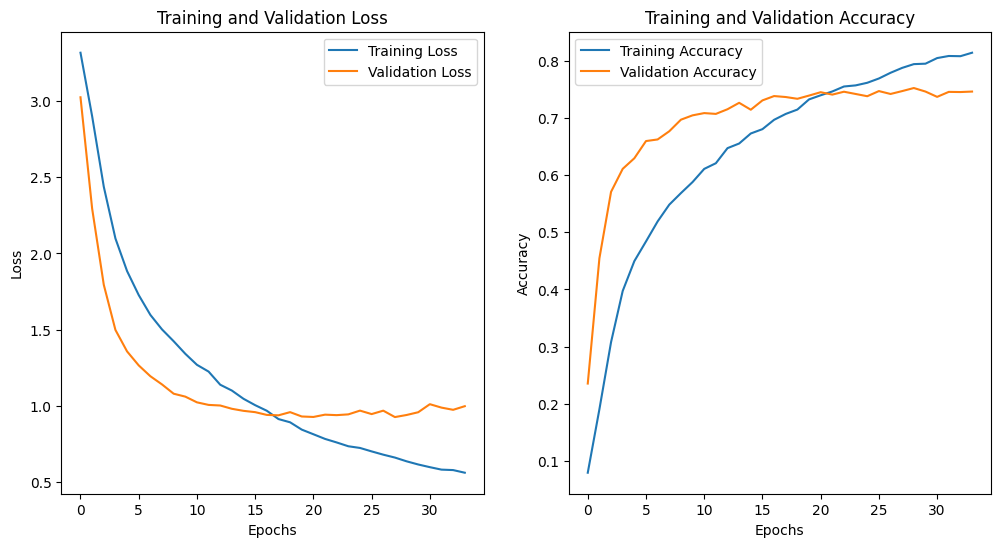

In [ ]:
import pickle
import matplotlib.pyplot as plt

history_dir = '/content/32_200_history_checkpoint.pkl'

with open(history_dir, 'rb') as f:
    history = pickle.load(f)

# Obtener el historial de entrenamiento
training_loss = history['loss']
validation_loss = history['val_loss']
training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']

# Trazar la pérdida de entrenamiento y validación.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Trazar la precisión del entrenamiento y la validación.
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()